Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The report is meant to predict the happiness score considering all the other factors in the dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df_happiness = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df_happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


The dataset has 158 rows and 12 columns.

In [3]:
# Renaming some columns for easy understanding
df_happiness = df_happiness.rename(columns={'Trust (Government Corruption)':'Corruption'})
df_happiness = df_happiness.rename(columns={'Health (Life Expectancy)':'Life Expectancy'})
df_happiness = df_happiness.rename(columns={'Economy (GDP per Capita)':'GDP per Capita'})

In [4]:
# Checking the details of the dataset including datatype.
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness Rank     158 non-null    int64  
 3   Happiness Score    158 non-null    float64
 4   Standard Error     158 non-null    float64
 5   GDP per Capita     158 non-null    float64
 6   Family             158 non-null    float64
 7   Life Expectancy    158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Corruption         158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


Country and Region are objects data type, happiness Rank is integer while others are floats..

In [5]:
# Checking if there is any null value as well as the counts
df_happiness.isnull().sum()

Country              0
Region               0
Happiness Rank       0
Happiness Score      0
Standard Error       0
GDP per Capita       0
Family               0
Life Expectancy      0
Freedom              0
Corruption           0
Generosity           0
Dystopia Residual    0
dtype: int64

There is no any null value in any of the columns, that makes the dataset better off.

In [6]:
df_happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,GDP per Capita,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The output shows details of mean, median(50%)and standard deviation of numeric variables of the dataset. Other information include minimum value, 1st quartile(25%), 3rd quartile(75%) and Maximum value. 

<Axes: >

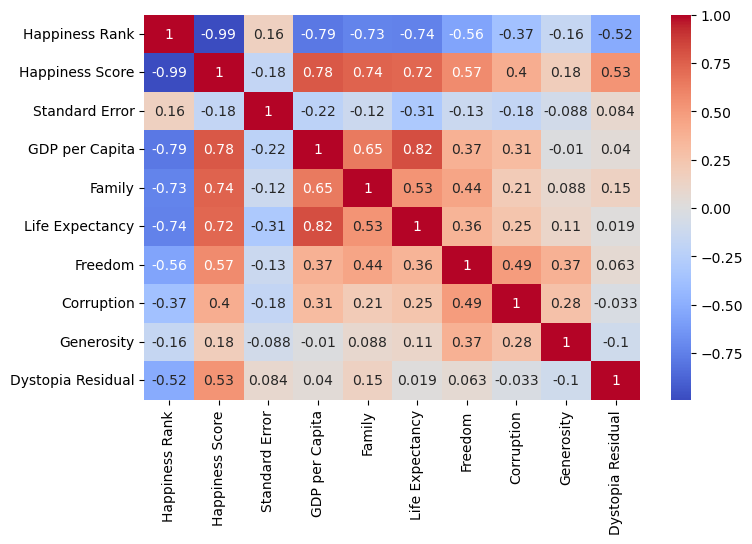

In [7]:
# Checking the correlation of the variables through visuals
corr = df_happiness.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')

Observations:
1. It could be seen that there is a relationship between Happiness Rank & Score. The relationship is inversely proportaional to eachother such that the higher the happiness rank, the lower the happiness score.
2. The similar experience with other variables
3. it is therefore suggested to remove happiness rank and see the effective correlations again.

In [8]:
# Removing 'Happiness Rank'
df1 = df_happiness.drop(['Happiness Rank'], axis=1)

<Axes: >

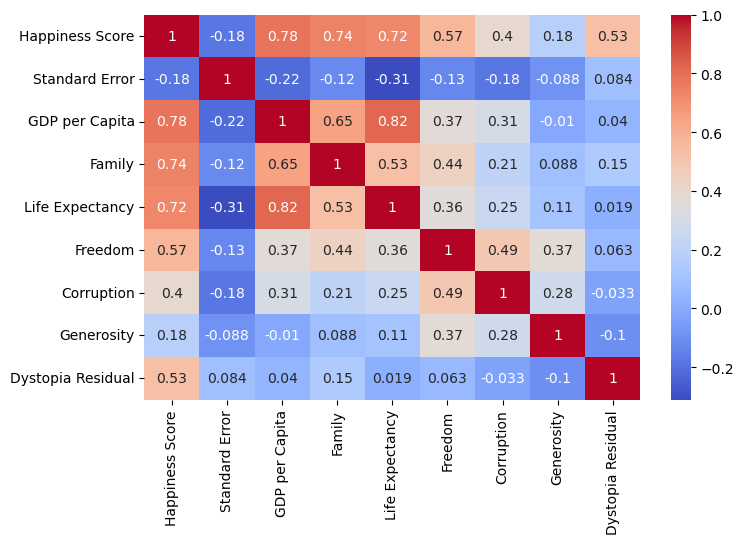

In [9]:
corr = df1.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')

The plot indicates Economy, Family, and Health are highly correlated with Happiness Score while Trust, Freedom, and Generosity is the least in that order.

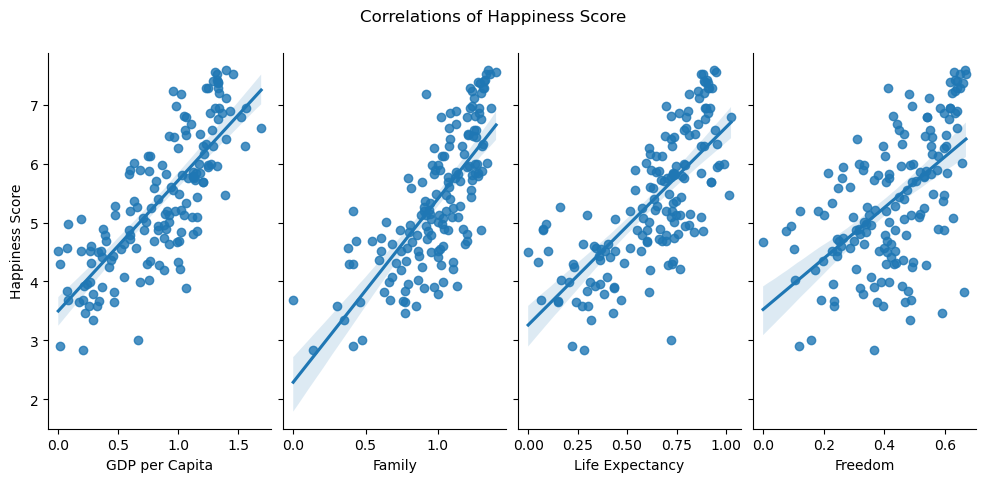

In [30]:
#Scatterplotting these values and see the correlation more clear
ax = sns.pairplot(df1, y_vars=['Happiness Score'],
             x_vars=['GDP per Capita','Family','Life Expectancy', 'Freedom'], kind = 'reg')
ax.fig.set_size_inches(10,5)
ax.fig.suptitle('Correlations of Happiness Score', y=1.05)
plt.show()

The plot further explains the correlations among the independent variables and affirms high relationship of happiness scores with GDP(economic sitaution), family, life expectancy and fredom. With GDP being the highest suggests a that economic situation affects the well being and hapiness status of people.

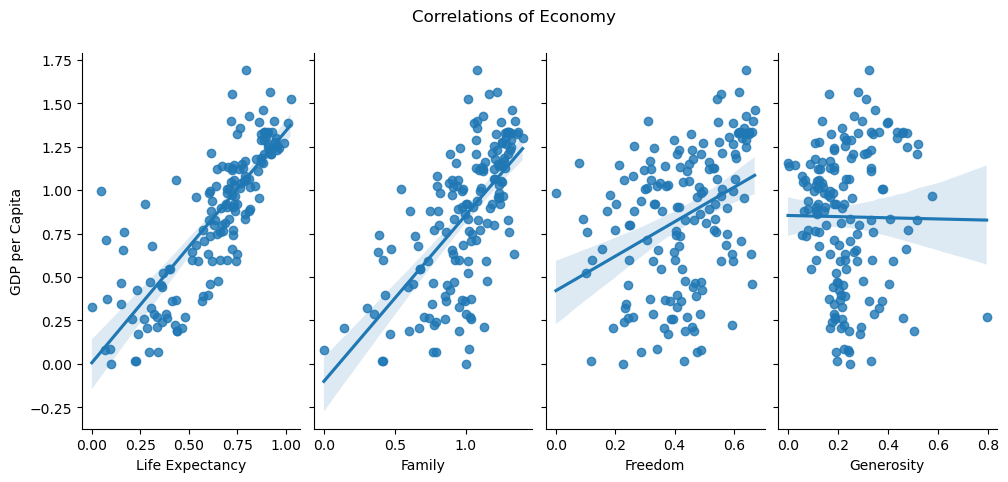

In [33]:
# To assess the extent of how GDP per Capital being the highest corrlation with happiness Score, on other aspect of the variables 
# Variables such as Life expectancy(Health), Family, Freedom and Generosity

ax1 = sns.pairplot(df1, y_vars=['GDP per Capita'],
             x_vars=['Life Expectancy', 'Family', 'Freedom', 'Generosity'], kind = 'reg')
ax1.fig.set_size_inches(10,5)
ax1.fig.suptitle('Correlations of Economy', y=1.05)
plt.show()

The plot shows the high impacts of GDP(Economy) on life expectancy(Health), Family and Freedom in that order. While in the case of Generosity, Economy drives the variable but at a point, there is no significant upward movement as Economic situation grows generosity declines.

In [10]:
#Show in ascending order the correlation of variables with Happiness Score 
corr = df1.corr()
corr['Happiness Score'].sort_values(ascending = False)

Happiness Score      1.000000
GDP per Capita       0.780966
Family               0.740605
Life Expectancy      0.724200
Freedom              0.568211
Dystopia Residual    0.530474
Corruption           0.395199
Generosity           0.180319
Standard Error      -0.177254
Name: Happiness Score, dtype: float64

In [11]:
#Creating a table of avg by region
#The data are sorted by the Happiness Score in Descending order

region_avg = df1.groupby(['Region']).mean(numeric_only=True).sort_values('Happiness Score', ascending=False)
region_avg

,Happiness Score,Standard Error,GDP per Capita,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
Region,,,,,,,,,
Australia and New Zealand,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
North America,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Western Europe,6.689619,0.037625,1.298596,1.247302,0.909148,0.549926,0.231463,0.302109,2.151185
Latin America and Caribbean,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Eastern Asia,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Middle East and Northern Africa,5.406900,0.046337,1.066974,0.920490,0.705615,0.361751,0.181702,0.190376,1.980008
Central and Eastern Europe,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Southeastern Asia,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769


 VISUALIZATIONS 

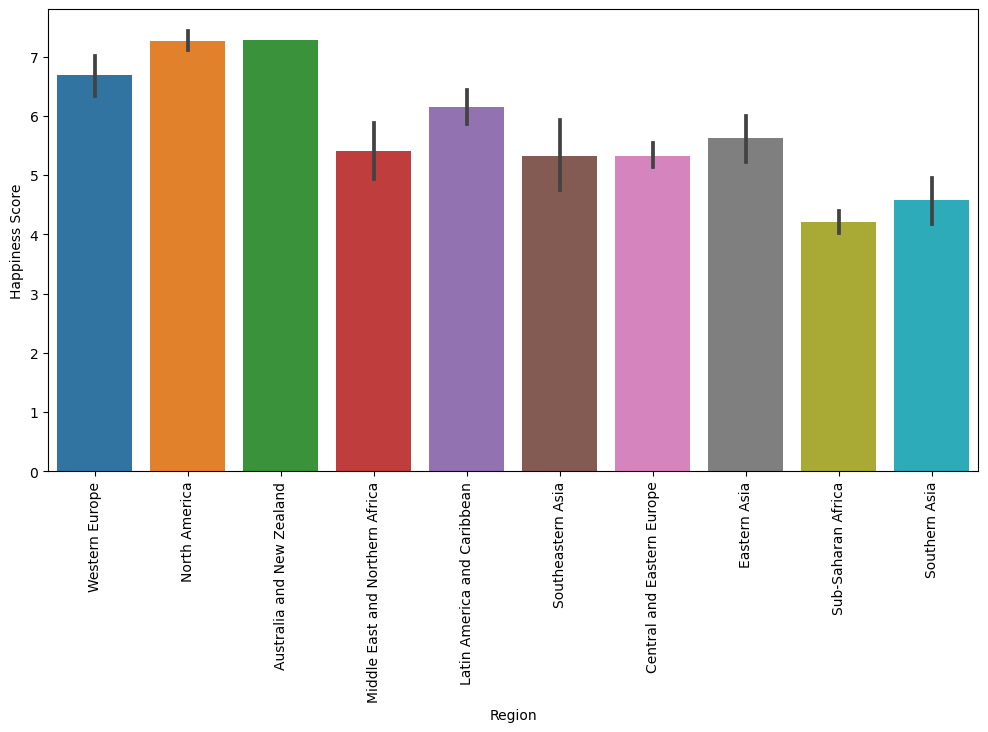

In [12]:
# Happiness Score with Regions
plt.figure(figsize = (12,6))
sns.barplot(x = 'Region',y='Happiness Score',data = df_happiness)
plt.xticks(rotation = 90)
plt.show()

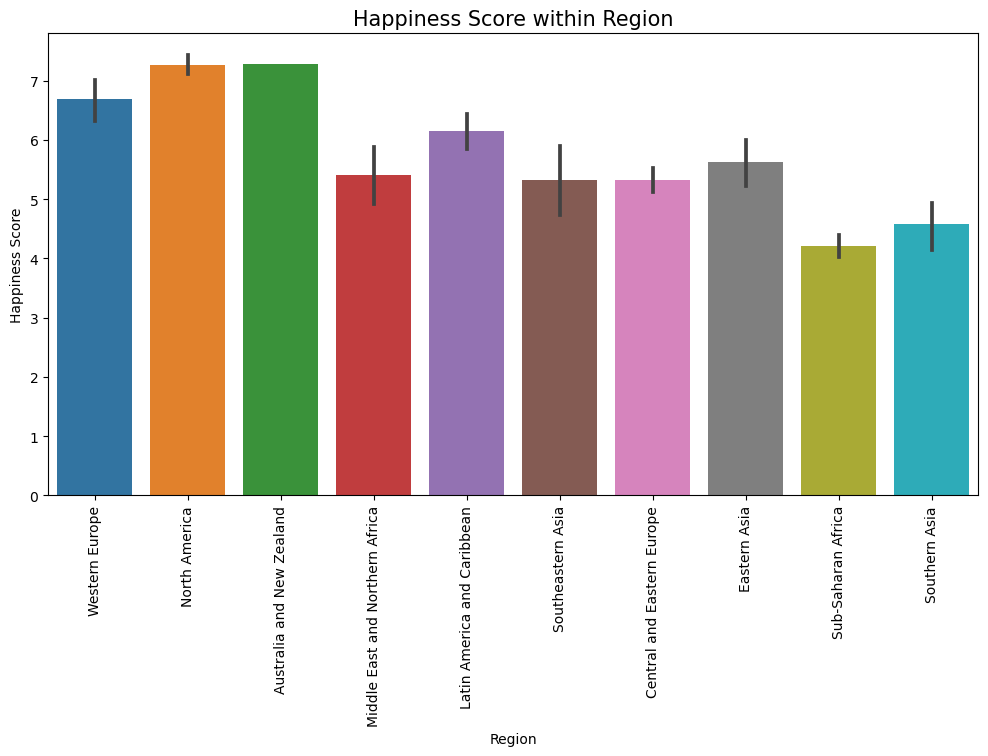

In [13]:
# Happiness Score with Regions
plt.figure(figsize = (12,6))
sns.barplot(x = 'Region',y='Happiness Score',data = df_happiness)
plt.title('Happiness Score within Region', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

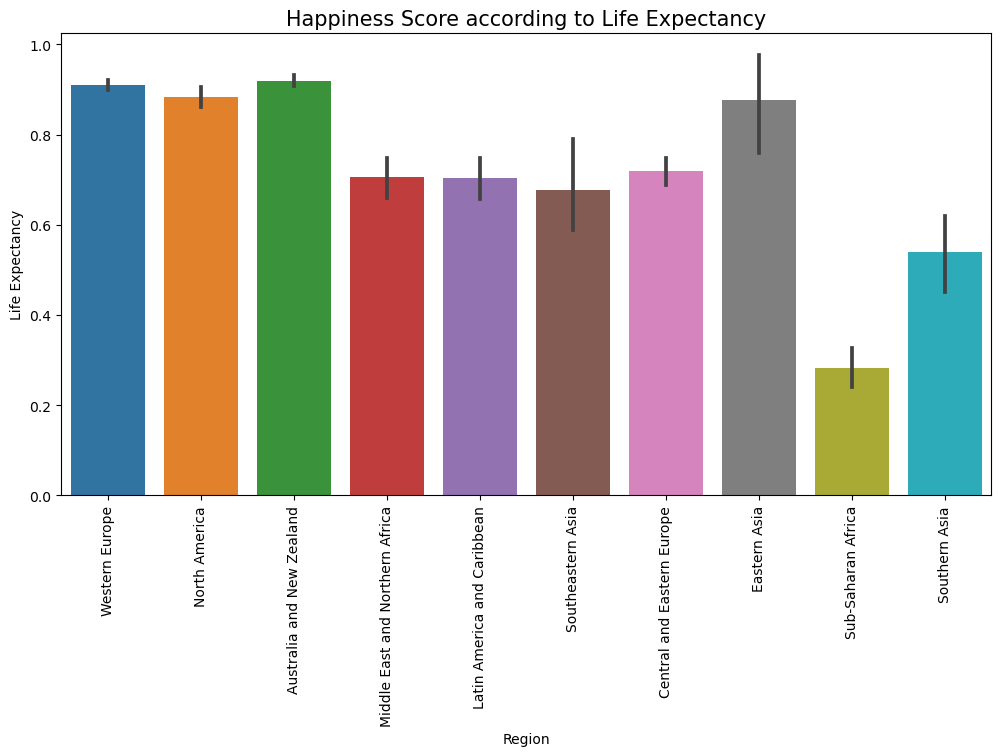

In [15]:
# Happiness Score with Life Expectancy
plt.figure(figsize = (12,6))
sns.barplot(x = 'Region',y='Life Expectancy',data = df_happiness)
plt.title('Happiness Score according to Life Expectancy', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

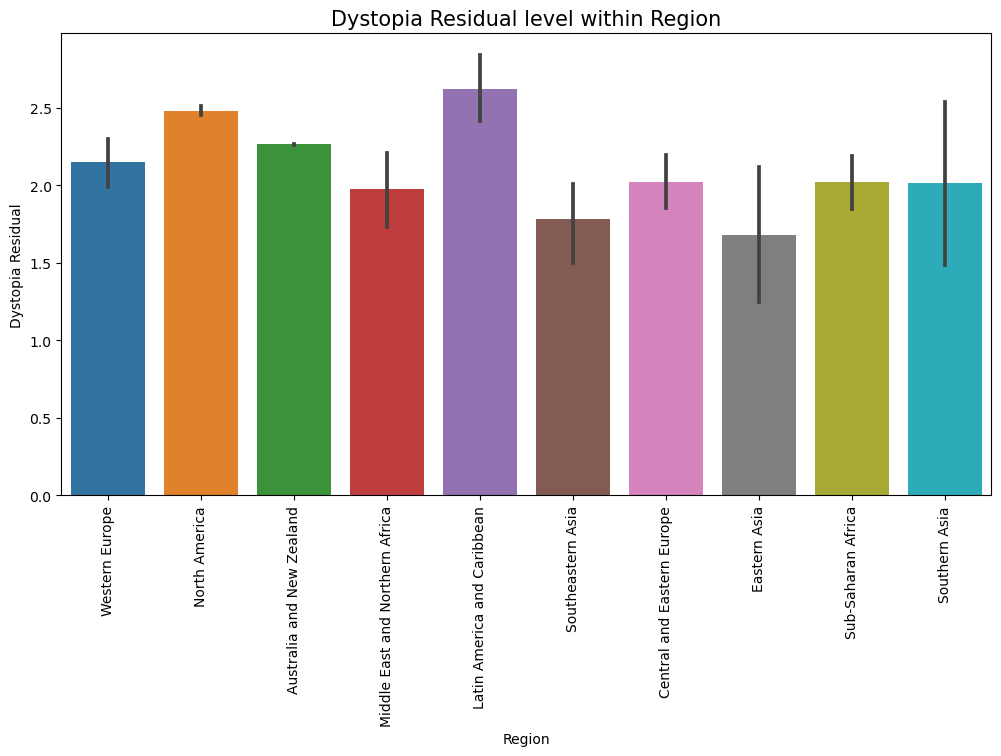

In [16]:
#Dystopia Residual level within Region
plt.figure(figsize = (12,6))
sns.barplot(x = 'Region',y='Dystopia Residual',data = df_happiness)
plt.title('Dystopia Residual level within Region', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

The Dystopia Residual value (which serves as a hypothetical worst-case scenario or reference point for assessing and comparing happiness levels in different contexts.) is higher in Latin Ameriac and Caribbean and still the region has strong scores of happiness.

In [22]:
# Prediction Model using Regression analysis
df_happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP per Capita,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [23]:
# For the purpose of the Model, Country, Region and happiness rank to be dropped.
#Spliting the varaiables in x and y for the model.
X = df_happiness.drop(['Happiness Score', 'Happiness Rank', 'Region', 'Country'], axis=1)
Y = df_happiness['Happiness Score']  

In [27]:
X

,Standard Error,GDP per Capita,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [25]:
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [38]:
# spliting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
#Training of the LinearRegression model for the predictions
#Loading the regression
regressor = LinearRegression()

In [40]:
regressor.fit(X_train, Y_train)
regressor.score(X_test, Y_test)

0.9999999472734886

# Evaluation Methods for Each Model
Cross-Validation with RMSE and MAE - Root Mean Squared Error (RMSE) & Mean Squared Error (MSE)
In addition to these metrics, we perform cross-validation to assess the model's generalization performance. Cross-validation helps estimate how well the model is likely to perform on unseen data. Lower values for these metrics indicate better model accuracy.

In [55]:
from sklearn.model_selection import cross_val_score
# For Linear Regression
scores = cross_val_score(regressor, X, Y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
mae_scores = -cross_val_score(regressor, X, Y, cv=5, scoring='neg_mean_absolute_error')
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(mean_rmse)
print(mean_mae)

0.0002945456263686929
0.0002573289751531031


The Model indicates almost 100% accuracy score

In [41]:
#Training of the RandomForestRegressormodel for the predictions
from sklearn.ensemble import RandomForestRegressor
regressor_forest = RandomForestRegressor(n_estimators = 10, random_state = 32)
regressor_forest.fit(X_train, Y_train)
regressor_forest.score(X_test,Y_test)

0.8907530543038628

The Model accuracy is 89% which is lower to Linear Regression Model. 
for this reason, we go for the Model with highest accuracy level .

In [56]:
# For RandomForest
scores = cross_val_score(regressor_forest, X, Y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
mae_scores = -cross_val_score(regressor_forest, X, Y, cv=5, scoring='neg_mean_absolute_error')
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(mean_rmse)
print(mean_mae)

0.5727934908779228
0.5119458467741935


In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [48]:
#Training of the XGRegressormodel for the predictions
regressor_xgboost = XGBRegressor(n_estimators = 10, random_state = 32)
regressor_xgboost.fit(X_train, Y_train)
regressor_xgboost.score(X_test,Y_test)

0.9157172701343486

The Model accuracy is 91.57% which is still lower to Linear Regression Model. for this reason, we go for the Model with highest accuracy level .

In [57]:
# For XGRegressormodel
scores = cross_val_score(regressor_xgboost, X, Y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
mae_scores = -cross_val_score(regressor_xgboost, X, Y, cv=5, scoring='neg_mean_absolute_error')
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(mean_rmse)
print(mean_mae)

0.6368171121988014
0.5768673013625607


In [58]:
# saving the model using .pkl
import joblib
joblib.dump(regressor, "World Happiness Report Project.pkl")

['World Happiness Report Project.pkl']

In [59]:
#Predict the saved model
model = joblib.load("World Happiness Report Project.pkl")

In [60]:
#Prediction
prediction = model.predict(X_test)
prediction

array([4.3068948 , 5.98711048, 4.19427325, 2.90449794, 5.05719348,
       6.57408073, 4.89750236, 4.87598661, 4.94867686, 3.93079047,
       6.90138435, 5.82828326, 6.98260635, 5.54817454, 6.78625304,
       6.50511133, 4.5071714 , 4.68555384, 4.97107435, 5.69530337,
       3.65507055, 6.93738926, 7.19985003, 7.28401364, 6.4851446 ,
       5.19231558, 5.88899588, 3.95561644, 4.3691434 , 3.68084808,
       3.78076713, 5.33249315])

In [61]:
#checking the prediction with original value
a = np.array(Y_test)
df_happiness = pd.DataFrame()
df_happiness["Predicted"] = prediction
df_happiness["Original"] = a
df_happiness

,Predicted,Original
0,4.306895,4.307
1,5.987110,5.987
2,4.194273,4.194
3,2.904498,2.905
4,5.057193,5.057
5,6.574081,6.574
6,4.897502,4.898
7,4.875987,4.876
8,4.948677,4.949
9,3.930790,3.931


The output of prediction and Actual is significantly the same and this validates the Model precision. 

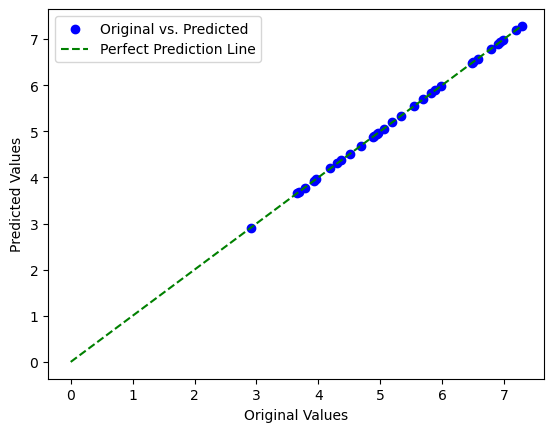

In [62]:
# Create a scatterplot
plt.scatter(df_happiness["Original"], df_happiness["Predicted"], color='blue', label='Original vs. Predicted')

# Add a diagonal line for reference (perfect prediction line)
max_value = max(df_happiness["Original"].max(), df_happiness["Predicted"].max())
plt.plot([0, max_value], [0, max_value], color='green', linestyle='--', label='Perfect Prediction Line')

# Label axes and add a legend
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

Conclusion:
It can be seen that a Multiple Linear Regression indicates the highest and nearly accurate prediction of 99.99% over Random Forest Regressor which gave 89%. The study suggests the reliability of Linear Regression to predict Happiness score.

# End